# Stock Market (S&P 500) Sigma (standard deviation) Analysis


In [1]:
#created by John Broberg on 2022-05-29
#inspired by "LET THE WILD RUMPUS BEGIN" by JEREMY GRANTHAM of GMO
#ref. https://www.gmo.com/globalassets/articles/viewpoints/2022/gmo_let-the-wild-rumpus-begin_1-22.pdf

#https://www.gmo.com/americas/research-library/entering-the-superbubbles-final-act/
#"...superbubbles – 2.5 to 3 sigma events..."
#"...ordinary 2 sigma bubbles..."
#"Ordinary bubbles are, to us, those that reach a 2 sigma deviation from trend. Superbubbles reach 2.5 sigma or greater."

#source data: https://www.nasdaq.com/market-activity/index/spx/historical

#cd
#cd git/StockMarketSigma
#git pull https://github.com/JohnBroberg/StockMarketSigma.git

#Get trendline equation
#https://stackoverflow.com/questions/49460596/add-trendline-with-equation-in-2d-array
#https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = 'HistoricalData_1708651347045.csv'
df = pd.read_csv(data)

df


,Date,Close/Last,Open,High,Low
0,02/21/2024,4981.80,4963.03,4983.21,4946.00
1,02/20/2024,4975.51,4989.32,4993.71,4955.02
2,02/16/2024,5005.57,5031.13,5038.70,4999.52
3,02/15/2024,5029.73,5003.14,5032.72,4999.44
4,02/14/2024,5000.62,4976.44,5002.52,4956.45
...,...,...,...,...,...
2526,02/28/2014,1859.45,1855.12,1867.92,1847.67
2527,02/27/2014,1854.29,1844.90,1854.53,1841.13
2528,02/26/2014,1845.16,1845.79,1852.65,1840.66
2529,02/25/2014,1845.12,1847.66,1852.91,1840.19


In [2]:
df.describe()

,Close/Last,Open,High,Low
count,2531.000000,2531.000000,2531.000000,2531.000000
mean,3042.408218,3029.793327,3046.144243,3012.309241
std,916.984511,942.679732,948.811954,936.645749
min,1815.690000,0.000000,0.000000,0.000000
25%,2139.305000,2139.465000,2147.810000,2131.395000
50%,2815.620000,2814.370000,2829.990000,2800.010000
75%,3939.965000,3938.140000,3968.815000,3911.385000
max,5029.730000,5031.130000,5048.390000,5016.830000


In [3]:
#remove holidays (Open == 0)

df = df.loc[~(df['Open']==0)]
df.describe()

,Close/Last,Open,High,Low
count,2516.000000,2516.000000,2516.000000,2516.000000
mean,3048.453939,3047.856483,3064.304881,3030.268160
std,916.336081,915.898112,921.922728,909.997648
min,1815.690000,1818.180000,1834.190000,1810.100000
25%,2150.970000,2149.415000,2160.482500,2139.552500
50%,2821.955000,2819.920000,2838.505000,2804.545000
75%,3944.007500,3939.890000,3970.605000,3915.292500
max,5029.730000,5031.130000,5048.390000,5016.830000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2530
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2516 non-null   object 
 1   Close/Last  2516 non-null   float64
 2   Open        2516 non-null   float64
 3   High        2516 non-null   float64
 4   Low         2516 non-null   float64
dtypes: float64(4), object(1)
memory usage: 117.9+ KB


In [5]:
df.shape

(2516, 5)

In [6]:
df.isnull().any()

Date          False
Close/Last    False
Open          False
High          False
Low           False
dtype: bool

<function matplotlib.pyplot.show(close=None, block=None)>

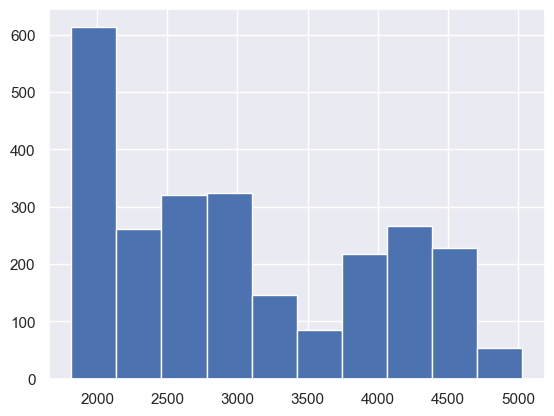

In [7]:
sns.set()

plt.hist(df['Close/Last'])
plt.show

In [8]:
close_current = df['Close/Last'].iloc[0]
close_current

4981.8

In [9]:
close_mean = df['Close/Last'].mean()
close_mean

3048.45393879174

In [10]:
close_sd = df['Close/Last'].std()
close_sd

916.3360814401291

In [11]:
sigma1 = close_mean + close_sd
sigma1

3964.7900202318688

In [12]:
sigma2 = close_mean + (2 * close_sd)  #bubble (from trend) according to Grantham
sigma2

4881.126101671998

In [13]:
sigma2_5 = close_mean + (2.5 * close_sd)  #super bubble (from trend) according to Grantham
sigma2_5

5339.294142392062

In [14]:
cols = ['Date','Close/Last']
df1 = df.loc[:,cols]
df1['Date'] = pd.to_datetime(df1['Date'], format = "%m/%d/%Y" )
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2516 entries, 0 to 2530
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2516 non-null   datetime64[ns]
 1   Close/Last  2516 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 59.0 KB


In [15]:
#Date Range
date_start = min(df1['Date']).date()
date_end = max(df1['Date']).date()

Text(0.5, 1.0, 'S&P 500 Daily Close/Last - 2014-02-24 to 2024-02-21')

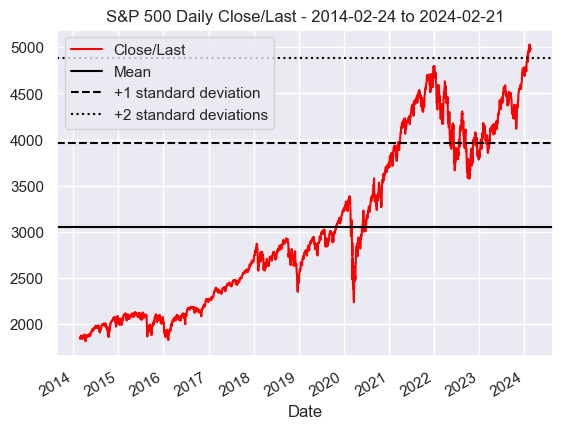

In [16]:
#Daily S&P 500 Close/Last, vs mean and standard deviations

if close_current > sigma2:
    c = 'red'
elif close_current > sigma1:
    c = 'orange'
else: 
    c = 'green'

df1.plot(x='Date', y='Close/Last', color = c)
plt.axhline(close_mean, color='black', label='Mean')
plt.axhline(sigma1, color='black', linestyle='--', label='+1 standard deviation')
plt.axhline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.legend()
plt.title(f'S&P 500 Daily Close/Last - {date_start} to {date_end}')

Text(0.5, 1.0, 'Density: S&P 500 Daily Close/Last - 2014-02-24 to 2024-02-21')

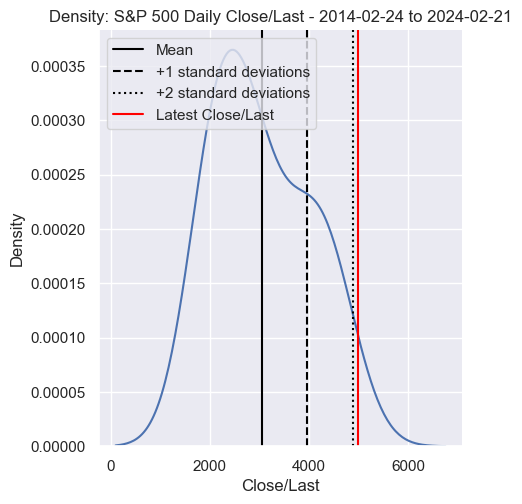

In [17]:
# Using Kernal Density Estimation (kde) to approximate probability density function
# https://seaborn.pydata.org/tutorial/distributions.html #kernel-density-estimation
#bw_adjust: adjust bandwidth to smoothe out modalities

sns.displot(df1['Close/Last'], kind='kde', bw_adjust=3.0) 

plt.axvline(close_mean, color='black', label='Mean')
plt.axvline(sigma1, color='black', linestyle='--', label='+1 standard deviations')
plt.axvline(sigma2, color='black', linestyle=':', label='+2 standard deviations')
plt.axvline(close_current, color=c, label='Latest Close/Last')
plt.legend(loc='upper left')
plt.title(f'Density: S&P 500 Daily Close/Last - {date_start} to {date_end}')

In [18]:
z_score = (close_current - close_mean)/close_sd
z_score

2.109865692694084

In [19]:
# https://realpython.com/linear-regression-in-python/
#Step 4: Get results